## Dataset  

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.  

slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart   

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect   

resting_blood_pressure (type: int): resting blood pressure  

chest_pain_type (type: int): chest pain type (4 values)  

num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy  

fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl  

resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)  

serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl  

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms  

sex (type: binary): 0: female, 1: male  

age (type: int): age in years  

max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)  

exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)  

In [1]:
# import 
# algebra tools
import math
import numpy as np 

# processing tools
import pandas as pd 
import re
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# visualization tools
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [2]:
# upload train and test files
test_values = pd.read_csv("test_values.csv")
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [3]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [6]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.9+ KB


### No missing data.

#   
# Feature Engineering:
#  

In [7]:
#lets create some features that might be interesting
dataset = [test_values, train_values]
for variable in dataset:
    
    variable['heart_rate/blood_pressure']= (variable['max_heart_rate_achieved']/variable['resting_blood_pressure']).round(2)
    variable['cholesterol/blood_pressure']= (variable['serum_cholesterol_mg_per_dl']/variable['resting_blood_pressure']).round(2)
    variable['blood_pressure/age']= (variable['resting_blood_pressure']/variable['age']).round(2)
    variable['cholesterol/age']= (variable['serum_cholesterol_mg_per_dl']/variable['age']).round(2)
    variable['heart_rate/age']= (variable['max_heart_rate_achieved']/variable['age']).round(2)
   
    #variable['log10(heart_rate)']= np.log10(variable['max_heart_rate_achieved']).round(2)
    #variable['log10(cholesterol)']= np.log10(variable['serum_cholesterol_mg_per_dl']).round(2)
    #variable['log10(blood_pressure)']= np.log10(variable['resting_blood_pressure']).round(2)
    #variable['log10(age)']= np.log10(variable['age']).round(2)
    
    #variable['heart_rate*blood_pressure']= (variable['max_heart_rate_achieved']*variable['resting_blood_pressure']).round(2)
    #variable['cholesterol*blood_pressure']= (variable['serum_cholesterol_mg_per_dl']*variable['resting_blood_pressure']).round(2)
    #variable['blood_pressure*age']= (variable['resting_blood_pressure']*variable['age']).round(2)
    #variable['cholesterol*age']= (variable['serum_cholesterol_mg_per_dl']*variable['age']).round(2)
    #variable['heart_rate*age']= (variable['max_heart_rate_achieved']*variable['age']).round(2)
    
    #variable['heart_rate*heart_rate']= (variable['max_heart_rate_achieved']*variable['max_heart_rate_achieved']).round(2)
    #variable['cholesterol*cholesterol']= (variable['serum_cholesterol_mg_per_dl']*variable['serum_cholesterol_mg_per_dl']).round(2)
    #variable['blood_pressure*blood_pressure']= (variable['resting_blood_pressure']*variable['resting_blood_pressure']).round(2)
    #variable['age*age']= (variable['age']*variable['age']).round(2)

In [8]:
train_values['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [9]:
train_values['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [10]:
train_values['resting_ekg_results'].value_counts()

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [11]:
train_values= pd.get_dummies(train_values, columns= ['thal','chest_pain_type','resting_ekg_results'], drop_first=False)
test_values= pd.get_dummies(test_values, columns= ['thal','chest_pain_type','resting_ekg_results'], drop_first=False)

In [12]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,1,128,0,0,308,0.0,1,45,170,...,0,1,0,0,1,0,0,0,0,1
1,ryoo3j,2,110,0,0,214,1.6,0,54,158,...,0,1,0,0,0,1,0,1,0,0
2,yt1s1x,1,125,3,0,304,0.0,1,77,162,...,0,1,0,0,0,0,1,0,0,1
3,l2xjde,1,152,0,0,223,0.0,1,40,181,...,0,0,1,0,0,0,1,1,0,0
4,oyt4ek,3,178,0,0,270,4.2,1,59,145,...,0,0,1,1,0,0,0,0,0,1


In [13]:
#standardize features by removing the mean and scaling to unit variance
ss = StandardScaler()
features= train_values.columns.drop('patient_id').tolist()
ss.fit(train_values[features].values)

standardized_train_values = train_values.copy()
standardized_test_values = test_values.copy()

standardized_train_values[features] = ss.transform(train_values[features])
standardized_test_values[features] = ss.transform(test_values[features])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [14]:
standardized_train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,-0.891241,-0.195195,-0.718403,-0.438238,1.118269,-0.903207,0.672022,-1.053964,0.932485,...,-0.215666,0.914732,-0.835532,-0.279006,2.329929,-0.680746,-0.914732,-0.945905,-0.074744,0.956501
1,ryoo3j,0.729197,-1.256320,-0.718403,-0.438238,-0.669778,0.527616,-1.488048,-0.087134,0.387084,...,-0.215666,0.914732,-0.835532,-0.279006,-0.429198,1.468977,-0.914732,1.057188,-0.074744,-1.045478
2,yt1s1x,-0.891241,-0.372049,2.385097,-0.438238,1.042182,-0.903207,0.672022,2.383654,0.568884,...,-0.215666,0.914732,-0.835532,-0.279006,-0.429198,-0.680746,1.093216,-0.945905,-0.074744,0.956501
3,l2xjde,-0.891241,1.219639,-0.718403,-0.438238,-0.498582,-0.903207,0.672022,-1.591092,1.432436,...,-0.215666,-1.093216,1.196843,-0.279006,-0.429198,-0.680746,1.093216,1.057188,-0.074744,-1.045478
4,oyt4ek,2.349636,2.752375,-0.718403,-0.438238,0.395442,2.852703,0.672022,0.449994,-0.203768,...,-0.215666,-1.093216,1.196843,3.584153,-0.429198,-0.680746,-0.914732,-0.945905,-0.074744,0.956501


In [15]:
visual_df = standardized_train_values.copy()
visual_df['heart_disease_present'] = train_labels['heart_disease_present']

visual_df.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,...,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,heart_disease_present
0,0z64un,-0.891241,-0.195195,-0.718403,-0.438238,1.118269,-0.903207,0.672022,-1.053964,0.932485,...,0.914732,-0.835532,-0.279006,2.329929,-0.680746,-0.914732,-0.945905,-0.074744,0.956501,0
1,ryoo3j,0.729197,-1.256320,-0.718403,-0.438238,-0.669778,0.527616,-1.488048,-0.087134,0.387084,...,0.914732,-0.835532,-0.279006,-0.429198,1.468977,-0.914732,1.057188,-0.074744,-1.045478,0
2,yt1s1x,-0.891241,-0.372049,2.385097,-0.438238,1.042182,-0.903207,0.672022,2.383654,0.568884,...,0.914732,-0.835532,-0.279006,-0.429198,-0.680746,1.093216,-0.945905,-0.074744,0.956501,1
3,l2xjde,-0.891241,1.219639,-0.718403,-0.438238,-0.498582,-0.903207,0.672022,-1.591092,1.432436,...,-1.093216,1.196843,-0.279006,-0.429198,-0.680746,1.093216,1.057188,-0.074744,-1.045478,1
4,oyt4ek,2.349636,2.752375,-0.718403,-0.438238,0.395442,2.852703,0.672022,0.449994,-0.203768,...,-1.093216,1.196843,3.584153,-0.429198,-0.680746,-0.914732,-0.945905,-0.074744,0.956501,0


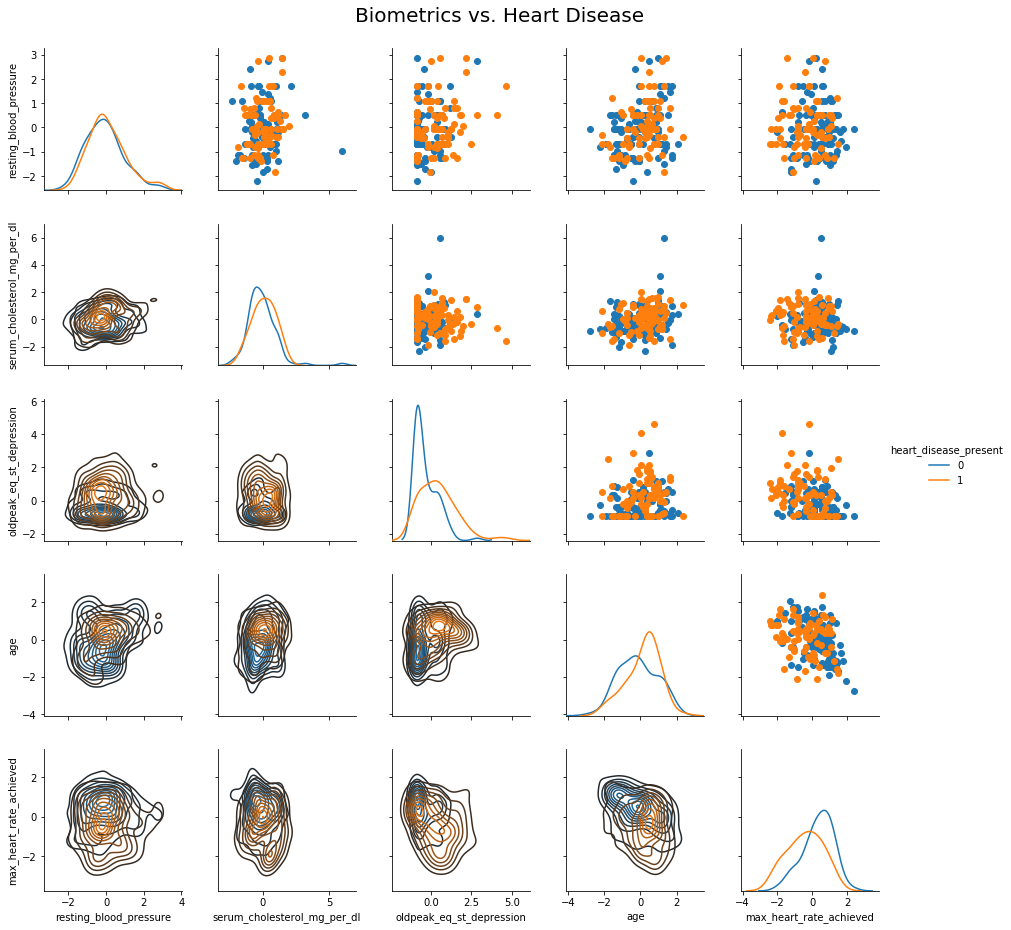

In [16]:
pairgrid1= sns.PairGrid(visual_df,
                        vars=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved'],
                        hue='heart_disease_present',
                       )

pairgrid1.map_upper(plt.scatter)
pairgrid1.map_diag(sns.kdeplot) #distripution plots
pairgrid1.map_lower(sns.kdeplot) #contour plots

pairgrid1.add_legend()
pairgrid1.fig.suptitle('Biometrics vs. Heart Disease', fontsize=20, y = 1.03)
plt.show()

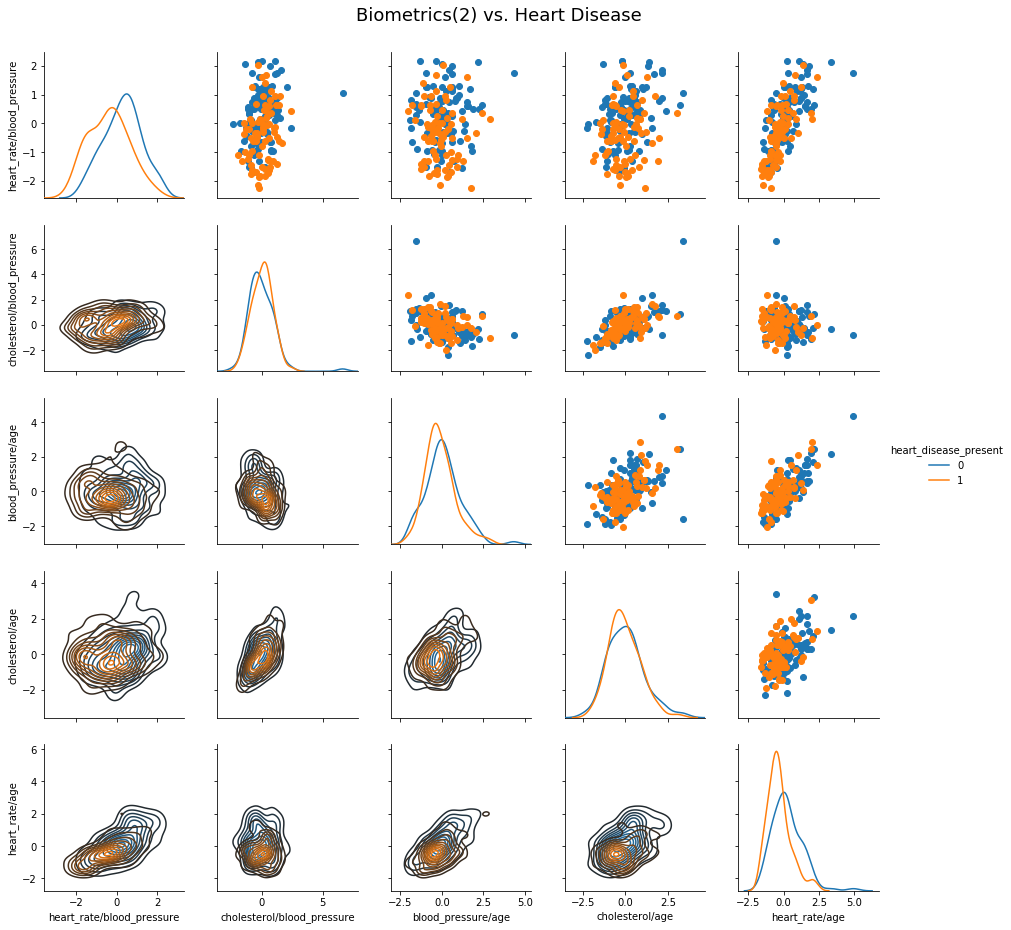

In [17]:
pairgrid2= sns.PairGrid(visual_df,
                        vars=['heart_rate/blood_pressure','cholesterol/blood_pressure' ,'blood_pressure/age', 'cholesterol/age','heart_rate/age'], 
                        hue='heart_disease_present',
                        )
pairgrid2.map_upper(plt.scatter)
pairgrid2.map_diag(sns.kdeplot) #distripution plots
pairgrid2.map_lower(sns.kdeplot) #contour plots


pairgrid2.fig.suptitle('Biometrics(2) vs. Heart Disease', fontsize=18, y = 1.03)
pairgrid2.add_legend()
plt.show()

In [18]:
#visual_df_org = pd.read_csv("train_values.csv")
#visual_df_org['heart_disease_present'] = train_labels['heart_disease_present']

###  
#### Unfortunatly, there is a lot of overlab between heart desease 0 and 1 in the biometrics that I plotted. It might prove difficult to classify based on these biometrics.

##  
# Fit Models (default parameters):
##  

In [19]:
#define some shorthands for our models' inputs'
x_train = standardized_train_values.drop("patient_id", axis=1)
y_train = train_labels['heart_disease_present']
x_test  = standardized_test_values.drop("patient_id", axis=1)

###   
###   

In [20]:
sgdc = SGDClassifier(tol= 1e-3, random_state=23)
sgdc.fit(x_train,y_train)

sgdc_prediction = sgdc.predict(x_test)

sgdc_score = cross_val_score(sgdc, x_train, y_train, cv=5)

print((sgdc_score.mean()*100).round(2))
print((sgdc_score.std()*100).round(2))

80.0
5.93


In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_prediction = knn.predict(x_test)

knn_score = cross_val_score(knn, x_train, y_train, cv=5)

print((knn_score.mean()*100).round(2))
print((knn_score.std()*100).round(2))

81.11
9.2


In [22]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_prediction = gnb.predict(x_test)

gnb_score = cross_val_score(gnb, x_train, y_train, cv=5)

print((gnb_score.mean()*100).round(2))
print((gnb_score.std()*100).round(2))

71.67
5.93


In [23]:
perceptron = Perceptron(max_iter=100000, tol= 1e-3, random_state=23)
perceptron.fit(x_train, y_train)

perceptron_prediction = perceptron.predict(x_test)

perceptron_score = cross_val_score(perceptron, x_train, y_train, cv=5)

print((perceptron_score.mean()*100).round(2))
print((perceptron_score.std()*100).round(2))

78.33
4.44


In [24]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=23)
rfc.fit(x_train, y_train)

rfc_prediction = rfc.predict(x_test)

rfc_score = cross_val_score(rfc, x_train, y_train, cv=5)

print((rfc_score.mean()*100).round(2))
print((rfc_score.std()*100).round(2))

80.0
7.33


In [25]:
lsvc = LinearSVC(max_iter=100000)
lsvc.fit(x_train, y_train)

lsvc_prediction = lsvc.predict(x_test)

lsvc_score = cross_val_score(lsvc, x_train, y_train, cv=5)

print((lsvc_score.mean()*100).round(2))
print((lsvc_score.std()*100).round(2))

79.44
8.89


In [26]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)

lr_prediction = lr.predict(x_test)

lr_score = cross_val_score(lr, x_train, y_train, cv=5)

print((lr_score.mean()*100).round(2))
print((lr_score.std()*100).round(2))

81.67
8.16


In [27]:
svc = SVC(gamma='scale', tol= 1e-3)
svc.fit(x_train, y_train)

svc_prediction = svc.predict(x_test)

svc_score = cross_val_score(svc, x_train, y_train, cv=5)

print((svc_score.mean()*100).round(2))
print((svc_score.std()*100).round(2))

77.22
8.85


###   
###   

In [28]:
linear = LinearRegression(normalize=True)
linear.fit(x_train, y_train)

linear_prediction = linear.predict(x_test)

linear_score = cross_val_score(linear, x_train, y_train, cv=5)

print((linear_score.mean()*100).round(2))
print((linear_score.std()*100).round(2))

38.21
19.36


In [29]:
br = BayesianRidge()
br.fit(x_train, y_train)

br_prediction = br.predict(x_test)

br_score = cross_val_score(br, x_train, y_train, cv=5)

print((br_score.mean()*100).round(2))
print((br_score.std()*100).round(2))

43.16
14.74


In [30]:
sgdr = SGDRegressor(tol= 1e-3, random_state=23)
sgdr.fit(x_train, y_train)

sgdr_prediction = sgdr.predict(x_test)

sgdr_score = cross_val_score(sgdr, x_train, y_train, cv=5)

print((sgdr_score.mean()*100).round(2))
print((sgdr_score.std()*100).round(2))

39.86
19.63


In [31]:
svr = SVR(gamma='scale', tol= 1e-3)
svr.fit(x_train, y_train)

svr_prediction = svr.predict(x_test)

svr_score = cross_val_score(svr, x_train, y_train, cv=5)

print((svr_score.mean()*100).round(2))
print((svr_score.std()*100).round(2))

30.7
13.34


In [32]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=23)
rfr.fit(x_train, y_train)

rfr_prediction = rfr.predict(x_test)

rfr_score = cross_val_score(rfr, x_train, y_train, cv=5)

print((rfr_score.mean()*100).round(2))
print((rfr_score.std()*100).round(2))

34.97
13.26


###   
###   

In [33]:
model_summary = pd.DataFrame({
                                  'Model': ['SGDClassifier', 'RandomForestClassifier', 'LogisticRegression',
                                            'KNeighborsClassifier' , 'GaussianNB', 'Perceptron', 
                                            'LinearSVC', 'SVC', 'RandomForestRegressor', 
                                            'SupportVectorRegressor','SGDRegressor', 'BayesianRidge', 
                                            'LinearRegression'],
                               
                               'Accuracy': [sgdc_score.mean(), rfc_score.mean(), lr_score.mean(),
                                            knn_score.mean(), gnb_score.mean(), perceptron_score.mean(),
                                            lsvc_score.mean(), svc_score.mean(), rfr_score.mean(),
                                            svr_score.mean(), sgdr_score.mean(), br_score.mean(),
                                            linear_score.mean()],
                               
                                 'Stdev': [sgdc_score.std(), rfc_score.std(), lr_score.std(),
                                           knn_score.std(), gnb_score.std(), perceptron_score.std(),
                                           lsvc_score.std(), svc_score.std(), rfr_score.std(), 
                                           svr_score.std(), sgdr_score.std(), br_score.std(), 
                                           linear_score.std()]
                              })

model_summary['Accuracy'] = (model_summary['Accuracy']*100).round(2)
model_summary['Stdev'] = (model_summary['Stdev']*100).round(2)

model_summary.sort_values(by=['Accuracy'], ascending=False).style.hide_index()

Model,Accuracy,Stdev
LogisticRegression,81.67,8.16
KNeighborsClassifier,81.11,9.2
SGDClassifier,80,5.93
RandomForestClassifier,80,7.33
LinearSVC,79.44,8.89
Perceptron,78.33,4.44
SVC,77.22,8.85
GaussianNB,71.67,5.93
BayesianRidge,43.16,14.74
SGDRegressor,39.86,19.63


###  
### Interesting note: Most regression Models didn't work very well for this problem, except logistic regression which worked better than all of my other models.
###   

#  
# Hyperparameter Tuning
#  

In [34]:
lr = LogisticRegression(random_state=23, n_jobs=-1)

penalty = ['l2', 'l1', 'elasticnet', 'none']

dual= [True, False]

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

C = [0.001, 0.01, 0.1, 1, 5, 10, 100]

fit_intercept = [True, False]

intercept_scaling= np.arange(0.05 , 2.05, 0.05)

max_iter = [10000]
    
multi_class= ['ovr', 'multinomial', 'auto']

lr_param_grid= dict(penalty=penalty, dual=dual, solver=solver, C=C, fit_intercept=fit_intercept, 
                    intercept_scaling=intercept_scaling, max_iter=max_iter, multi_class=multi_class)

lr_grid= RandomizedSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy',
                            n_iter=400, n_jobs=-1, random_state=23, error_score=0, iid=False)

lr_grid.fit(x_train, y_train)

print("Best estimator that was chosen by the search:")
print(lr_grid.best_estimator_)
f'Mean cross-validated score of the best estimator is: {(lr_grid.best_score_*100).round(2)}'

Best estimator that was chosen by the search:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1.7000000000000002, max_iter=10000,
          multi_class='auto', n_jobs=-1, penalty='l2', random_state=23,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)


'Mean cross-validated score of the best estimator is: 82.78'

In [35]:
lr2 = lr_grid.best_estimator_
lr2.fit(x_train, y_train)

lr2_prediction = lr2.predict_proba(x_test)

lr2_score = cross_val_score(lr2, x_train, y_train, cv=5)

print((lr2_score.mean()*100).round(2))
print((lr2_score.std()*100).round(2))

82.78
5.93


In [36]:
lr_feature_weights = pd.DataFrame(lr2.coef_)
lr_feature_weights = lr_feature_weights.transpose()

In [37]:
lr_features= pd.DataFrame()
lr_features['feature']= x_train.columns
lr_features['lr_feature_weights']= abs(lr_feature_weights)
lr_features["lr_feature_weights"] = (lr_features["lr_feature_weights"] / lr_features["lr_feature_weights"].sum()).round(4)  #softmax normlization

lr_features= lr_features.sort_values(by=['lr_feature_weights'], ascending=False) #.style.hide_index()
lr_features

,feature,lr_feature_weights
17,thal_reversible_defect,0.0956
2,num_major_vessels,0.0951
16,thal_normal,0.0927
21,chest_pain_type_4,0.0907
9,exercise_induced_angina,0.0771
6,sex,0.0738
5,oldpeak_eq_st_depression,0.0657
0,slope_of_peak_exercise_st_segment,0.0545
20,chest_pain_type_3,0.0512
8,max_heart_rate_achieved,0.0491


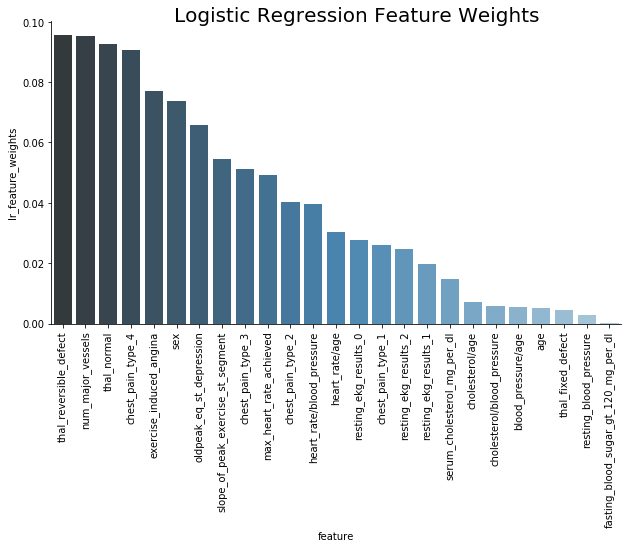

In [38]:
sns.catplot(x='feature', y='lr_feature_weights', kind='bar', data= lr_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Logistic Regression Feature Weights', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [39]:
lr2_prediction = pd.DataFrame(lr2_prediction)

In [40]:
cleveland_heart_disease_lr_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_lr_prediction['heart_disease_present'] = lr2_prediction[1]
print(cleveland_heart_disease_lr_prediction.info())
cleveland_heart_disease_lr_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.483754
1,z9n6mx,0.206619
2,5k4413,0.752845
3,mrg7q5,0.181362
4,uki4do,0.680641


In [41]:
#cleveland_heart_disease_lr_prediction.to_csv('cleveland_heart_disease_lr_prediction.csv', index = False) 

In [42]:
svc = SVC(probability=True, max_iter=10000, random_state=23)


C= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

kernel= ['linear', 'poly', 'rbf', 'sigmoid']

degree= np.arange(0.1, 1.00, 0.05).tolist() + np.arange(1, 10 , 1).tolist() + np.arange(10, 110 , 10).tolist()

gamma= ['auto_deprecated', 'auto', 'scale']

decision_function_shape = ['ovr', 'ovo']

coef0= [0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

shrinking = [True, False]

svc_param_grid= dict(kernel=kernel, degree=degree, C=C, coef0=coef0, gamma=gamma,
                      shrinking = shrinking, decision_function_shape=decision_function_shape) 

svc_grid= RandomizedSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy',
                              n_iter=2000, n_jobs=-1, random_state=23, error_score=0, iid=False)

svc_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(svc_grid.best_estimator_)
f'Mean cross-validated score of the best estimator is: {(svc_grid.best_score_*100).round(2)}'

Best estimator that was chosen by the search:
SVC(C=5, cache_size=200, class_weight=None, coef0=3,
  decision_function_shape='ovo', degree=0.30000000000000004, gamma='scale',
  kernel='sigmoid', max_iter=10000, probability=True, random_state=23,
  shrinking=False, tol=0.001, verbose=False)


'Mean cross-validated score of the best estimator is: 83.89'

In [43]:
svc2 = lr_grid.best_estimator_
svc2.fit(x_train, y_train)

svc2_prediction = svc2.predict_proba(x_test)

svc2_score = cross_val_score(svc2, x_train, y_train, cv=5)
              
print((svc2_score.mean()*100).round(2))
print((svc2_score.std()*100).round(2))

82.78
5.93


In [44]:
svc_feature_weights = pd.DataFrame(svc2.coef_)
svc_feature_weights = svc_feature_weights.transpose()

In [45]:
svc_features= pd.DataFrame()
svc_features['feature']= x_train.columns
svc_features['svc_feature_weights']= abs(svc_feature_weights)
svc_features["svc_feature_weights"] = (svc_features["svc_feature_weights"] / svc_features["svc_feature_weights"].sum()).round(4)  #softmax normlization

svc_features= svc_features.sort_values(by=['svc_feature_weights'], ascending=False) #.style.hide_index()
svc_features

,feature,svc_feature_weights
17,thal_reversible_defect,0.0956
2,num_major_vessels,0.0951
16,thal_normal,0.0927
21,chest_pain_type_4,0.0907
9,exercise_induced_angina,0.0771
6,sex,0.0738
5,oldpeak_eq_st_depression,0.0657
0,slope_of_peak_exercise_st_segment,0.0545
20,chest_pain_type_3,0.0512
8,max_heart_rate_achieved,0.0491


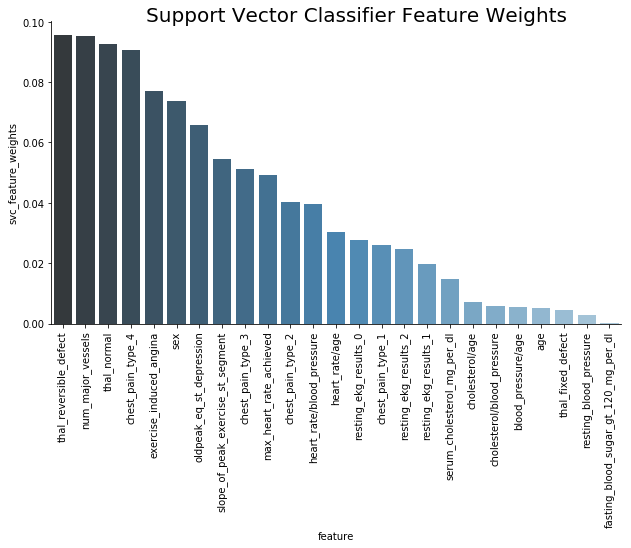

In [46]:
sns.catplot(x='feature', y='svc_feature_weights', kind='bar', data= svc_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Support Vector Classifier Feature Weights', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [47]:
svc2_prediction = pd.DataFrame(svc2_prediction)

In [48]:
cleveland_heart_disease_svc_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_svc_prediction['heart_disease_present'] = svc2_prediction[1].round(6)
print(cleveland_heart_disease_svc_prediction.info())
cleveland_heart_disease_svc_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.483754
1,z9n6mx,0.206619
2,5k4413,0.752845
3,mrg7q5,0.181362
4,uki4do,0.680641


In [49]:
#cleveland_heart_disease_svc_prediction.to_csv('cleveland_heart_disease_svc_prediction.csv', index = False)

In [50]:
gnb = GaussianNB()

var_smoothing=[ 0, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01] + np.arange(0.1, 1.05, 0.05).tolist() + np.arange(1, 11 , 1).tolist()

gnb_param_grid= dict(var_smoothing=var_smoothing) 

gnb_grid= RandomizedSearchCV(gnb, gnb_param_grid, cv=5, scoring='accuracy',
                              n_iter=37, n_jobs=-1, random_state=23, error_score=0, iid=False)

gnb_grid.fit(x_train, y_train)


print("Best estimator that was chosen by the search:")
print(gnb_grid.best_estimator_)
f'Mean cross-validated score of the best estimator is: {(gnb_grid.best_score_*100).round(2)}'

Best estimator that was chosen by the search:
GaussianNB(priors=None, var_smoothing=0.8000000000000002)


'Mean cross-validated score of the best estimator is: 81.67'

In [51]:
gnb2 = gnb_grid.best_estimator_
gnb2.fit(x_train, y_train)

gnb2_prediction = gnb2.predict_proba(x_test)

gnb2_score = cross_val_score(gnb, x_train, y_train, cv=5)

print((gnb2_score.mean()*100).round(2))
print((gnb2_score.std()*100).round(2))

71.67
5.93


In [52]:
gnb2_prediction = pd.DataFrame(gnb2_prediction.round(6))
gnb2_prediction.head()

,0,1
0,0.584488,0.415512
1,0.999100,0.000900
2,0.008042,0.991958
3,0.998504,0.001496
4,0.017120,0.982880


In [53]:
cleveland_heart_disease_gnb_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_gnb_prediction['heart_disease_present'] = gnb2_prediction[1].round(6)
print(cleveland_heart_disease_gnb_prediction.info())
cleveland_heart_disease_gnb_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.415512
1,z9n6mx,0.000900
2,5k4413,0.991958
3,mrg7q5,0.001496
4,uki4do,0.982880


In [54]:
#cleveland_heart_disease_gnb_prediction.to_csv('cleveland_heart_disease_gnb_prediction.csv', index = False)

In [55]:
knn = KNeighborsClassifier(n_jobs=-1)

n_neighbors= np.arange(1, 26 , 1).tolist() #Number of neighbors to use by default for kneighbors queries.

weights = ['uniform', 'distance'] #Weight function used in prediction.

algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute'] #Algorithm used to compute the nearest neighbors
    
leaf_size= np.arange(10, 50 , 1).tolist() #Leaf size passed to BallTree or KDTree.

p= [1,2] #Power parameter for the Minkowski metric

metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'] 

#the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

knn_param_grid= dict(n_neighbors=n_neighbors, weights=weights, 
                     algorithm=algorithm, leaf_size=leaf_size, p=p)

knn_grid= RandomizedSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy',
                             n_jobs=-1, n_iter=1000, random_state=23, error_score=0, iid=False)

knn_grid.fit(x_train, y_train)

print("Best estimator that was chosen by the search:")
print(knn_grid.best_estimator_)
f'Mean cross-validated score of the best estimator is: {(knn_grid.best_score_*100).round(2)}'

Best estimator that was chosen by the search:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=38, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=1,
           weights='uniform')


'Mean cross-validated score of the best estimator is: 83.33'

In [56]:
knn2 = knn_grid.best_estimator_
knn2.fit(x_train, y_train)

knn2_prediction = knn2.predict_proba(x_test)

knn2_score = cross_val_score(knn2, x_train, y_train, cv=5)

print((knn2_score.mean()*100).round(2))
print((knn2_score.std()*100).round(2))

83.33
5.83


In [57]:
knn2_prediction = pd.DataFrame(knn2_prediction.round(6))
knn2_prediction.head()

,0,1
0,0.384615,0.615385
1,0.923077,0.076923
2,0.076923,0.923077
3,0.846154,0.153846
4,0.000000,1.000000


In [58]:
cleveland_heart_disease_knn_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_knn_prediction['heart_disease_present'] = knn2_prediction[1].round(6)
print(cleveland_heart_disease_knn_prediction.info())
cleveland_heart_disease_knn_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.615385
1,z9n6mx,0.076923
2,5k4413,0.923077
3,mrg7q5,0.153846
4,uki4do,1.000000


In [59]:
#cleveland_heart_disease_knn_prediction.to_csv('cleveland_heart_disease_knn_prediction.csv', index = False)

In [60]:
rfc = RandomForestClassifier(random_state=23, n_jobs=-1)


criterion = ['gini', 'entropy'] #The function to measure the quality of a split

n_estimators = [1000, 10000] #The number of trees in the forest

min_samples_split = [2,4,8] #The minimum number of samples required to split an internal node

min_samples_leaf = [1,2,4] #The minimum number of samples required to be at a leaf node

max_features = ['auto', 'sqrt', 'log2'] #The number of features to consider when looking for the best split

rfc_param_grid= dict(criterion=criterion, n_estimators=n_estimators, 
                     min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)

rfc_grid= RandomizedSearchCV(rfc, rfc_param_grid, cv=5, scoring='accuracy',
                             n_jobs=-1, n_iter=270, random_state=23, error_score=0, iid=False)

rfc_grid.fit(x_train, y_train)

print("Best estimator that was chosen by the search:")
print(rfc_grid.best_estimator_)
f'Mean cross-validated score of the best estimator is: {(rfc_grid.best_score_*100).round(2)}'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 108 is smaller than n_iter=270. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best estimator that was chosen by the search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)


'Mean cross-validated score of the best estimator is: 82.22'

In [61]:
rfc2 = rfc_grid.best_estimator_
rfc2.fit(x_train, y_train)

rfc2_prediction = rfc2.predict_proba(x_test)

rfc2_score = cross_val_score(rfc2, x_train, y_train, cv=5)

print((rfc2_score.mean()*100).round(2))
print((rfc2_score.std()*100).round(2))

82.22
7.78


In [62]:
rfc_features= pd.DataFrame()
rfc_features['feature']= x_train.columns
rfc_features['rfc_feature_importances_']= rfc2.feature_importances_*100
rfc_features['rfc_feature_importances_'] = (rfc_features['rfc_feature_importances_'] / rfc_features['rfc_feature_importances_'].sum()).round(4)  #softmax normlization

rfc_features= rfc_features.sort_values(by=['rfc_feature_importances_'], ascending=False) #.style.hide_index()
rfc_features

,feature,rfc_feature_importances_
17,thal_reversible_defect,0.1170
16,thal_normal,0.1131
21,chest_pain_type_4,0.1084
5,oldpeak_eq_st_depression,0.0726
2,num_major_vessels,0.0722
9,exercise_induced_angina,0.0576
14,heart_rate/age,0.0570
8,max_heart_rate_achieved,0.0527
10,heart_rate/blood_pressure,0.0510
7,age,0.0418


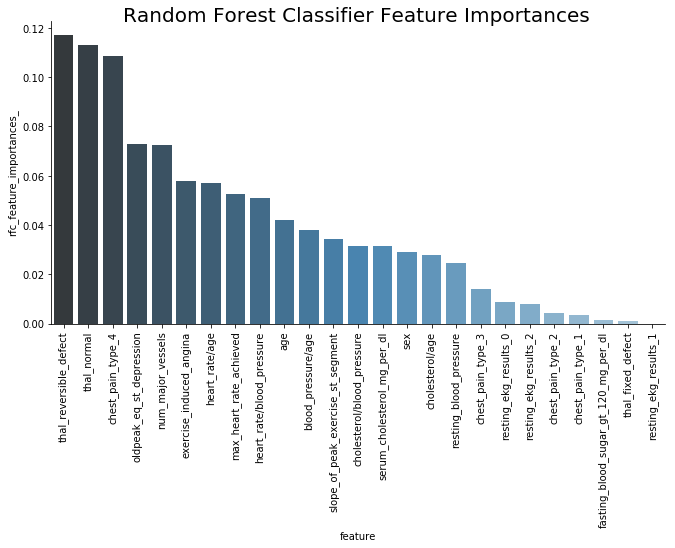

In [63]:
sns.catplot(x='feature', y='rfc_feature_importances_', kind='bar', data= rfc_features, height=5, aspect=2, palette="Blues_d")
plt.suptitle('Random Forest Classifier Feature Importances', fontsize=20, y = 1.0)
plt.xticks(rotation=90)
plt.show()

In [64]:
rfc2_prediction = pd.DataFrame(rfc2_prediction.round(6))
rfc2_prediction.head()

,0,1
0,0.526047,0.473953
1,0.837624,0.162376
2,0.127874,0.872126
3,0.685590,0.314410
4,0.271728,0.728272


In [65]:
cleveland_heart_disease_rfc_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_rfc_prediction['heart_disease_present'] = rfc2_prediction[1].round(6)
print(cleveland_heart_disease_rfc_prediction.info())
cleveland_heart_disease_rfc_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.473953
1,z9n6mx,0.162376
2,5k4413,0.872126
3,mrg7q5,0.314410
4,uki4do,0.728272


In [66]:
#cleveland_heart_disease_rfc_prediction.to_csv('cleveland_heart_disease_rfc_prediction.csv', index = False)

In [67]:
vc= VotingClassifier(estimators=[('gnb2', gnb2), ('knn2', knn2), ('rfc2', rfc2), ('lr2', lr2), ('svc2', svc2)],
                     voting='soft',
                     weights = [gnb2_score.mean(), knn2_score.mean(), rfc2_score.mean(), lr2_score.mean(), svc2_score.mean()],
                     n_jobs=-1)

vc.fit(x_train, y_train)

vc_prediction = vc.predict_proba(x_test)

vc_score = cross_val_score(vc, x_train, y_train, cv=5)

print((vc_score.mean()*100).round(2))
print((vc_score.std()*100).round(2))

81.67
6.48


In [68]:
vc_prediction = pd.DataFrame(vc_prediction.round(6))
vc_prediction.head()

,0,1
0,0.503155,0.496845
1,0.865850,0.134150
2,0.145039,0.854961
3,0.829174,0.170826
4,0.189784,0.810216


In [69]:
cleveland_heart_disease_vc_prediction = test_values.patient_id.to_frame('patient_id')
cleveland_heart_disease_vc_prediction['heart_disease_present'] = vc_prediction[1].round(6)
print(cleveland_heart_disease_vc_prediction.info())
cleveland_heart_disease_vc_prediction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
patient_id               90 non-null object
heart_disease_present    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,patient_id,heart_disease_present
0,olalu7,0.496845
1,z9n6mx,0.134150
2,5k4413,0.854961
3,mrg7q5,0.170826
4,uki4do,0.810216


In [70]:
#cleveland_heart_disease_vc_prediction.to_csv('cleveland_heart_disease_vc5_train_prediction.csv', index = False) 

In [71]:
#Best overall DrivenData submission log loss = 0.34338 Rank:328/3704 2019-10-08 19:13:10 UTC 